In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_parquet('data/LDAP-training.parquet')
df = pd.concat([df, pd.read_parquet('data/LDAP-testing.parquet')])
df = pd.concat([df, pd.read_parquet('data/NetBIOS-training.parquet')])
df = pd.concat([df, pd.read_parquet('data/NetBIOS-testing.parquet')])
df['Label'].value_counts()

Label
Benign           8836
LDAP             1884
DrDoS_LDAP       1440
NetBIOS           644
DrDoS_NetBIOS     598
Name: count, dtype: int64

In [6]:
# perform a QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Label', axis=1), df['Label'], test_size=0.30, random_state=101)

# Create a QDA object
qda = QuadraticDiscriminantAnalysis()

# Fit the model to the data
qda.fit(X_train, y_train)

# Make predictions
predictions = qda.predict(X_test)

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.789107187266849


c:\Users\benha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [7]:
# plot classification report
print(classification_report(y_test, predictions))


               precision    recall  f1-score   support

       Benign       0.99      0.99      0.99      2656
   DrDoS_LDAP       0.42      0.93      0.57       425
DrDoS_NetBIOS       1.00      0.01      0.01       186
         LDAP       0.15      0.05      0.07       573
      NetBIOS       0.51      0.66      0.58       181

     accuracy                           0.79      4021
    macro avg       0.61      0.53      0.45      4021
 weighted avg       0.79      0.79      0.75      4021



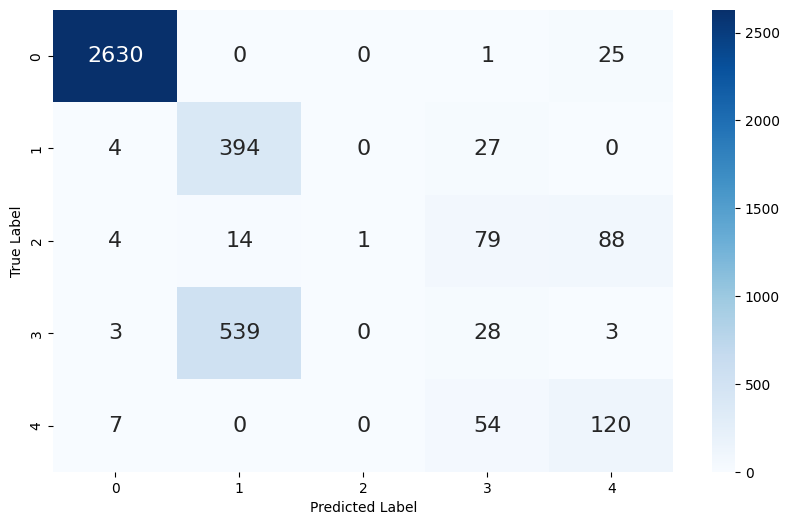

In [8]:
# plot the confusion matrix heatmap
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()